
## **Entertainment Analysis**

---



In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing files

ent_basic = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/Entertainer%20-%20Basic%20Info.csv')
ent_break = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/Entertainer%20-%20Breakthrough%20Info.csv')
ent_last = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/Entertainer%20-%20Last%20work%20Info.csv')

In [3]:
ent_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entertainer           70 non-null     object
 1   Gender (traditional)  70 non-null     object
 2   Birth Year            70 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [4]:
ent_basic.head()

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [5]:
ent_break.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 2   Breakthrough Name                             70 non-null     object 
 3   Year of First Oscar/Grammy/Emmy               64 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [6]:
ent_break.head()

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [7]:
ent_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entertainer                         70 non-null     object 
 1   Year of Last Major Work (arguable)  70 non-null     int64  
 2   Year of Death                       30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
ent_last.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


## EDA - Entertainer Basic Data


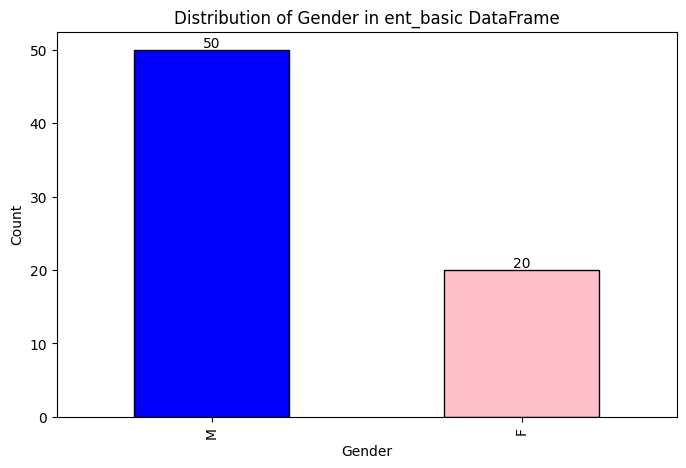

In [9]:
# Count the occurrences of each gender
gender_distribution = ent_basic['Gender (traditional)'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))

# Plotting the bars
bars = gender_distribution.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

# Adding total count annotations on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in ent_basic DataFrame')

# Display the plot
plt.show()

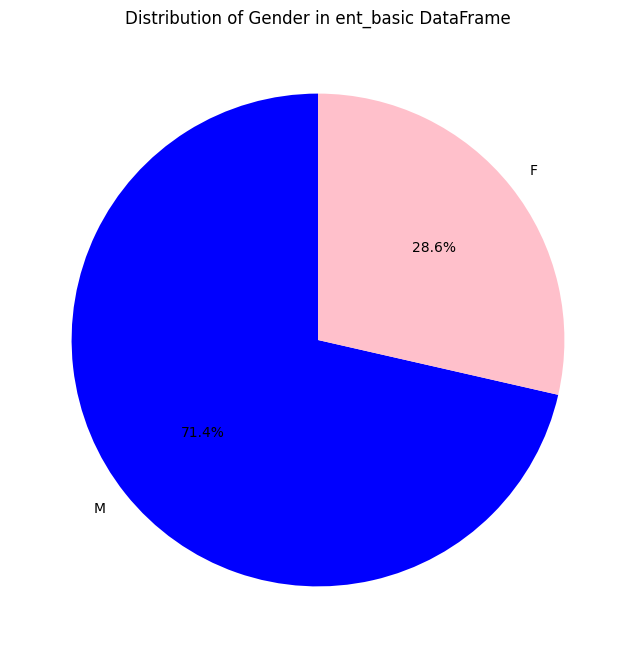

In [10]:
# Count the occurrences of each gender
gender_distribution = ent_basic['Gender (traditional)'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))

# Plotting the pie chart
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

# Adding title
plt.title('Distribution of Gender in ent_basic DataFrame')

# Display the plot
plt.show()

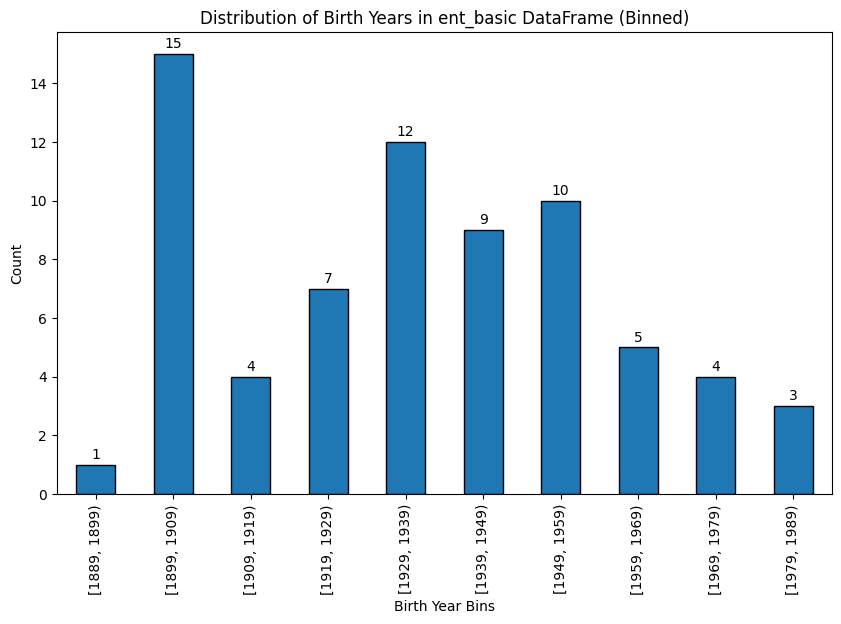

In [11]:
# Create bins of 10 years
bins = list(range(ent_basic['Birth Year'].min(), ent_basic['Birth Year'].max() + 11, 10))

# Create a new column 'Birth Year Bins' with the bins
ent_basic['Birth Year Bins'] = pd.cut(ent_basic['Birth Year'], bins, right=False)

# Count the occurrences in each bin
birth_year_distribution = ent_basic['Birth Year Bins'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plotting the bars
bars = birth_year_distribution.plot(kind='bar', edgecolor='black')

# Adding total count annotations on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Adding labels and title
plt.xlabel('Birth Year Bins')
plt.ylabel('Count')
plt.title('Distribution of Birth Years in ent_basic DataFrame (Binned)')

# Display the plot
plt.show()

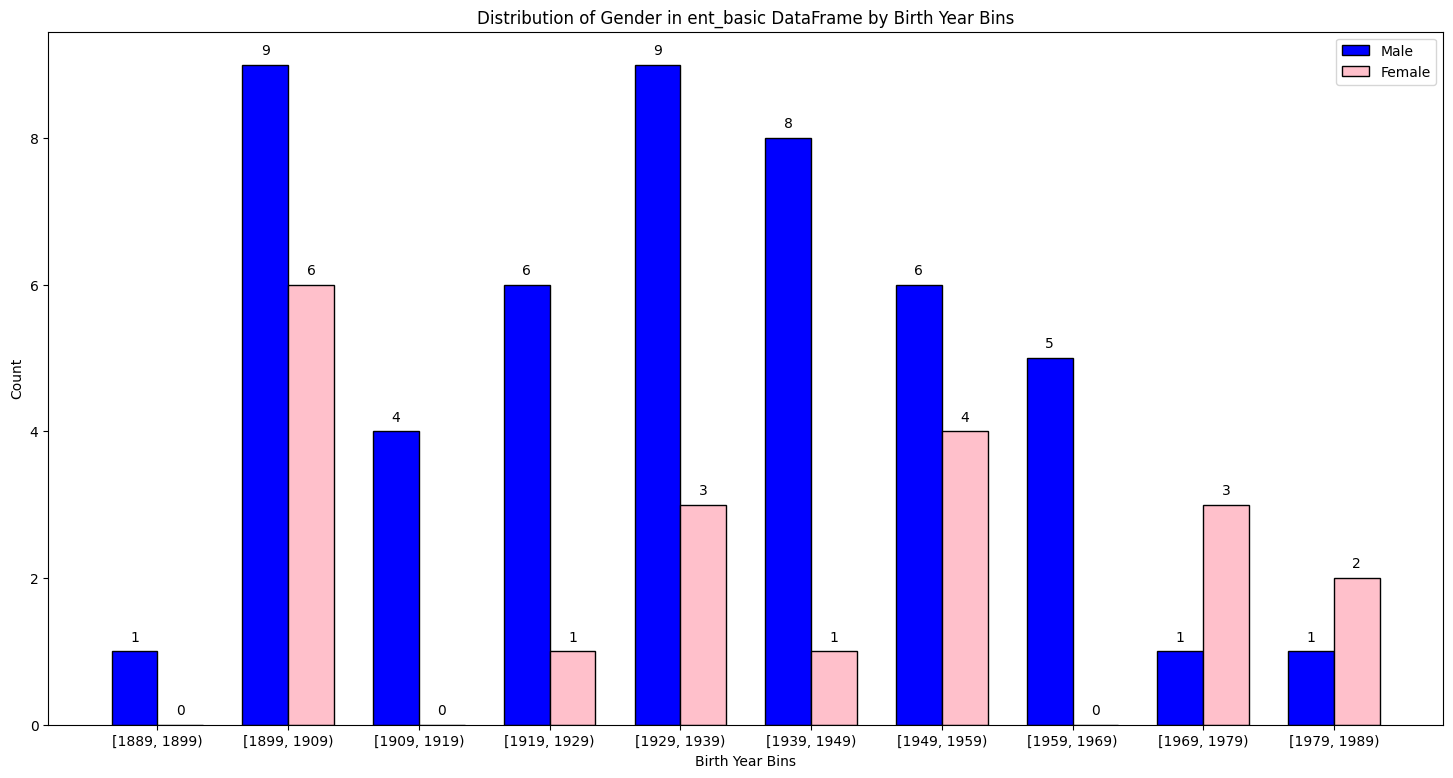

In [12]:
# Create bins of 10 years
bins = list(range(ent_basic['Birth Year'].min(), ent_basic['Birth Year'].max() + 11, 10))

# Create a new column 'Birth Year Bins' with the bins
ent_basic['Birth Year Bins'] = pd.cut(ent_basic['Birth Year'], bins, right=False)

# Group by 'Birth Year Bins' and 'Gender (traditional)' and count occurrences
gender_distribution_by_bins = ent_basic.groupby(['Birth Year Bins', 'Gender (traditional)']).size().unstack().fillna(0)

# Plotting the bar chart with counts on top of the bars
plt.figure(figsize=(18, 9))

bar_width = 0.35
index = range(len(gender_distribution_by_bins.index))

# Plotting the bars for Male
bars1 = plt.bar(index, gender_distribution_by_bins['M'], bar_width, label='Male', edgecolor='black', color='blue')

# Plotting the bars for Female
bars2 = plt.bar([i + bar_width for i in index], gender_distribution_by_bins['F'], bar_width, label='Female', edgecolor='black', color='pink')

# Adding labels and title
plt.xlabel('Birth Year Bins')
plt.ylabel('Count')
plt.title('Distribution of Gender in ent_basic DataFrame by Birth Year Bins')

# Adding counts on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.xticks([i + bar_width/2 for i in index], gender_distribution_by_bins.index)
plt.legend()
plt.show()



---



In [13]:
# Merge the DataFrames on the 'Entertainer' column
ent_award = pd.merge(ent_basic, ent_break, on='Entertainer')

# Display the resulting DataFrame 'ent_award'
print(ent_award)

        Entertainer Gender (traditional)  Birth Year Birth Year Bins  \
0             Adele                    F        1988    [1979, 1989)   
1    Angelina Jolie                    F        1975    [1969, 1979)   
2   Aretha Franklin                    F        1942    [1939, 1949)   
3       Bette Davis                    F        1908    [1899, 1909)   
4       Betty White                    F        1922    [1919, 1929)   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956    [1949, 1959)   
66     Tony Bennett                    M        1926    [1919, 1929)   
67     Wayne Newton                    M        1942    [1939, 1949)   
68       Will Smith                    M        1968    [1959, 1969)   
69    Willie Nelson                    M        1933    [1929, 1939)   

    Year of Breakthrough/#1 Hit/Award Nomination  \
0                                           2008   
1                              

In [14]:
# Convert 'Year of First Award' to numeric and calculate 'Nomination Age'
ent_award['Year of Breakthrough/#1 Hit/Award Nomination'] = pd.to_numeric(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'], errors='coerce')  # Convert to numeric
ent_award['Nomination Age'] = ent_award['Year of Breakthrough/#1 Hit/Award Nomination'] - ent_award['Birth Year']

# Display the resulting DataFrame 'ent_award'
print(ent_award)

        Entertainer Gender (traditional)  Birth Year Birth Year Bins  \
0             Adele                    F        1988    [1979, 1989)   
1    Angelina Jolie                    F        1975    [1969, 1979)   
2   Aretha Franklin                    F        1942    [1939, 1949)   
3       Bette Davis                    F        1908    [1899, 1909)   
4       Betty White                    F        1922    [1919, 1929)   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956    [1949, 1959)   
66     Tony Bennett                    M        1926    [1919, 1929)   
67     Wayne Newton                    M        1942    [1939, 1949)   
68       Will Smith                    M        1968    [1959, 1969)   
69    Willie Nelson                    M        1933    [1929, 1939)   

    Year of Breakthrough/#1 Hit/Award Nomination  \
0                                           2008   
1                              

In [15]:
# Convert 'Year of First Award' to numeric and calculate 'Award Age'
ent_award['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(ent_award['Year of First Oscar/Grammy/Emmy'], errors='coerce')  # Convert to numeric
ent_award['Award Age'] = ent_award['Year of First Oscar/Grammy/Emmy'] - ent_award['Birth Year']

# Display the resulting DataFrame 'ent_award'
print(ent_award)

        Entertainer Gender (traditional)  Birth Year Birth Year Bins  \
0             Adele                    F        1988    [1979, 1989)   
1    Angelina Jolie                    F        1975    [1969, 1979)   
2   Aretha Franklin                    F        1942    [1939, 1949)   
3       Bette Davis                    F        1908    [1899, 1909)   
4       Betty White                    F        1922    [1919, 1929)   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956    [1949, 1959)   
66     Tony Bennett                    M        1926    [1919, 1929)   
67     Wayne Newton                    M        1942    [1939, 1949)   
68       Will Smith                    M        1968    [1959, 1969)   
69    Willie Nelson                    M        1933    [1929, 1939)   

    Year of Breakthrough/#1 Hit/Award Nomination  \
0                                           2008   
1                              

In [16]:
ent_award.head()

,Entertainer,Gender (traditional),Birth Year,Birth Year Bins,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Nomination Age,Award Age
0,Adele,F,1988,"[1979, 1989)",2008,19,2009.0,20,21.0
1,Angelina Jolie,F,1975,"[1969, 1979)",1999,"Girl, Interrupted",1999.0,24,24.0
2,Aretha Franklin,F,1942,"[1939, 1949)",1967,I Never Loved a Man (The Way I Love You),1968.0,25,26.0
3,Bette Davis,F,1908,"[1899, 1909)",1934,Of Human Bondage,1935.0,26,27.0
4,Betty White,F,1922,"[1919, 1929)",1952,Life with Elilzabeth,1976.0,30,54.0


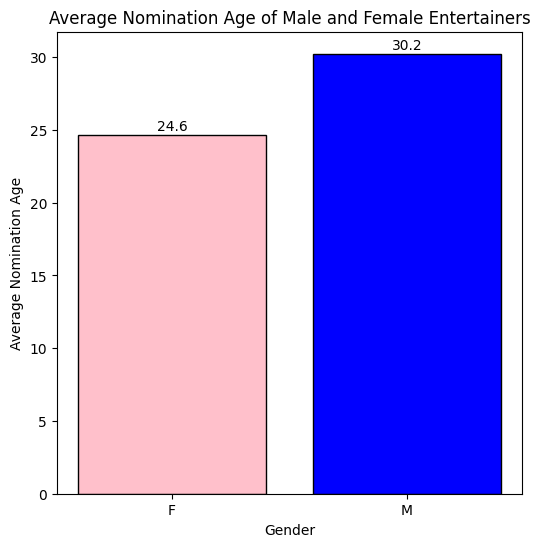

In [28]:
# Group by 'Gender (traditional)' and calculate average 'Nomination Age'
average_age_by_gender = ent_award.groupby('Gender (traditional)')['Nomination Age'].mean()

# Plotting the bar chart with average values on top
plt.figure(figsize=(6, 6))

# Plotting the bars
bars = plt.bar(average_age_by_gender.index, average_age_by_gender, color=['pink', 'blue'], edgecolor='black')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Nomination Age')
plt.title('Average Nomination Age of Male and Female Entertainers')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()

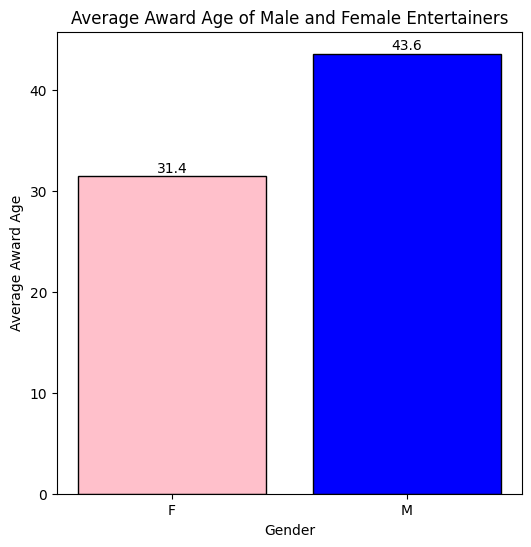

In [29]:
# Group by 'Gender (traditional)' and calculate average 'Award Age'
average_age_by_gender = ent_award.groupby('Gender (traditional)')['Award Age'].mean()

# Plotting the bar chart with average values on top
plt.figure(figsize=(6, 6))

# Plotting the bars
bars = plt.bar(average_age_by_gender.index, average_age_by_gender, color=['pink', 'blue'], edgecolor='black')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Award Age')
plt.title('Average Award Age of Male and Female Entertainers')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()

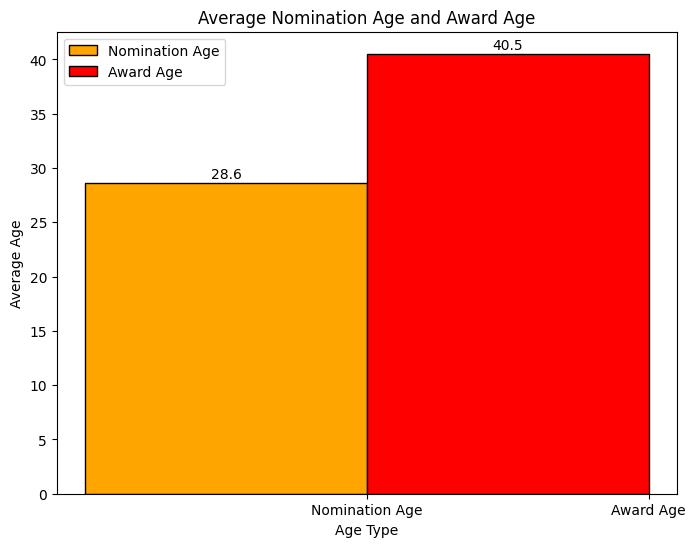

In [41]:
# Calculate average ages
average_age = ent_award[['Nomination Age', 'Award Age']].mean()

# Plotting the multiple bar chart
plt.figure(figsize=(8, 6))

# Bar width
bar_width = 0.35

# Plotting the bars for 'Nomination Age'
bars1 = plt.bar([0], [average_age['Nomination Age']], bar_width, label='Nomination Age', color='orange', edgecolor='black')

# Plotting the bars for 'Award Age'
bars2 = plt.bar([bar_width], [average_age['Award Age']], bar_width, label='Award Age', color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Age Type')
plt.ylabel('Average Age')
plt.title('Average Nomination Age and Award Age')
plt.xticks([bar_width / 2, bar_width + bar_width / 2], ['Nomination Age', 'Award Age'])

# Adding values on top of the bars for 'Nomination Age'
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Adding values on top of the bars for 'Award Age'
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.legend()
plt.show()

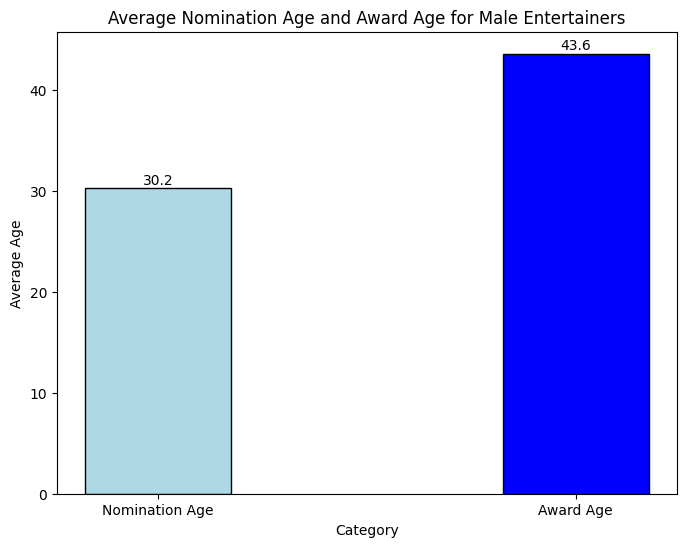

In [45]:
# Filter data for male entertainers
male_data = ent_award[ent_award['Gender (traditional)'] == 'M']

# Calculate average ages for male entertainers
average_age_male = male_data[['Nomination Age', 'Award Age']].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Bar width
bar_width = 0.35

# Plotting the bars for 'Nomination Age' and 'Award Age'
bars = plt.bar(range(len(average_age_male)), average_age_male, bar_width, edgecolor='black', color=['lightblue', 'blue'])

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.title('Average Nomination Age and Award Age for Male Entertainers')
plt.xticks(range(len(average_age_male)), ['Nomination Age', 'Award Age'])

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()

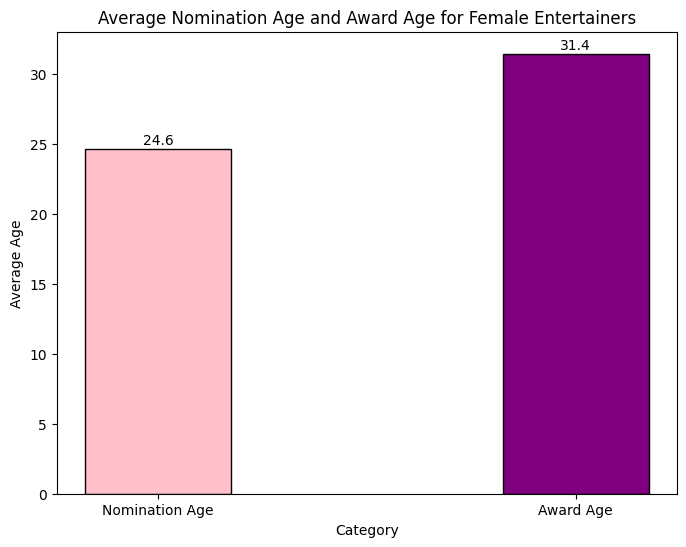

In [47]:
# Filter data for female entertainers
female_data = ent_award[ent_award['Gender (traditional)'] == 'F']

# Calculate average ages for female entertainers
average_age_female = female_data[['Nomination Age', 'Award Age']].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Bar width
bar_width = 0.35

# Plotting the bars for 'Nomination Age' and 'Award Age'
bars = plt.bar(range(len(average_age_female)), average_age_female, bar_width, edgecolor='black', color=['pink', 'purple'])

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.title('Average Nomination Age and Award Age for Female Entertainers')
plt.xticks(range(len(average_age_female)), ['Nomination Age', 'Award Age'])

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()

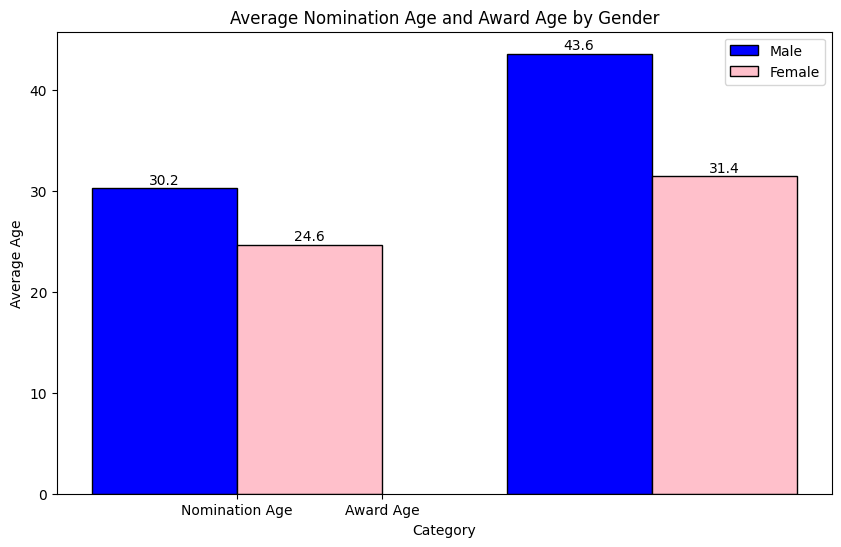

In [50]:
# Separate data by gender
male_data = ent_award[ent_award['Gender (traditional)'] == 'M']
female_data = ent_award[ent_award['Gender (traditional)'] == 'F']

# Calculate average ages for both genders
average_age_male = male_data[['Nomination Age', 'Award Age']].mean()
average_age_female = female_data[['Nomination Age', 'Award Age']].mean()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Plotting the bars for 'Nomination Age' and 'Award Age'
bars1 = plt.bar(range(len(average_age_male)), average_age_male, bar_width, label='Male', edgecolor='black', color=['blue', 'blue'])
bars2 = plt.bar([x + bar_width for x in range(len(average_age_female))], average_age_female, bar_width, label='Female', edgecolor='black', color=['pink', 'pink'])

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.title('Average Nomination Age and Award Age by Gender')
plt.xticks([bar_width / 2, 3 * bar_width / 2], ['Nomination Age', 'Award Age'])

# Adding legend
plt.legend()

# Adding values on top of the bars for Male 'Nomination Age' and 'Award Age'
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Adding values on top of the bars for Female 'Nomination Age' and 'Award Age'
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

# Display the plot
plt.show()

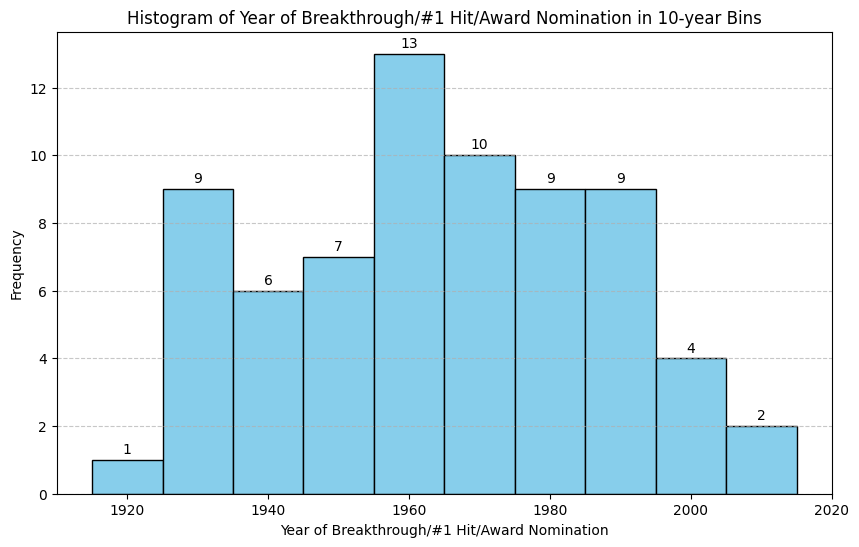

In [52]:
# Create bins of 10 years
bins = list(range(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'].min(),
                 ent_award['Year of Breakthrough/#1 Hit/Award Nomination'].max() + 11, 10))

# Plotting the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'], bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Year of Breakthrough/#1 Hit/Award Nomination')
plt.ylabel('Frequency')
plt.title('Histogram of Year of Breakthrough/#1 Hit/Award Nomination in 10-year Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the bars
for value, bin, patch in zip(n, bins, patches):
    plt.text(bin + 5, value + 0.1, int(value), ha='center', va='bottom', color='black', fontsize=10)

plt.show()


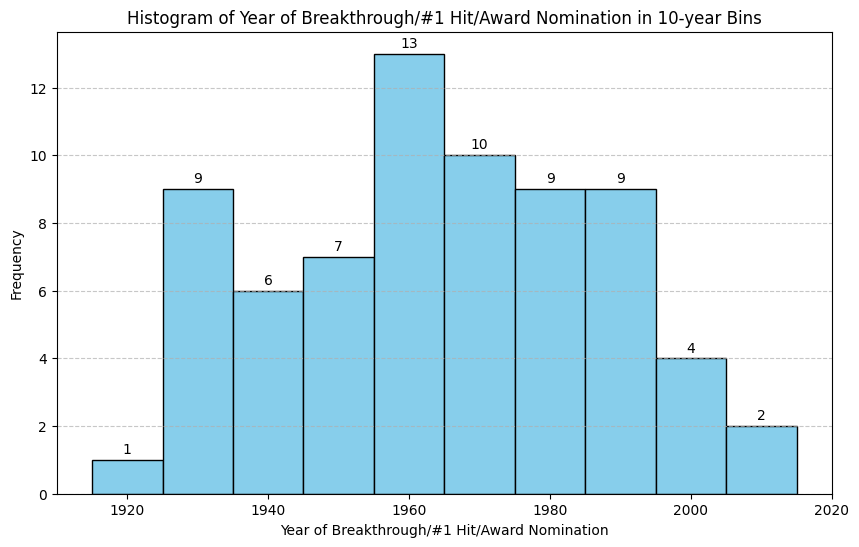

In [57]:
# Convert 'Year of Breakthrough/#1 Hit/Award Nomination' to numeric
ent_award['Year of Breakthrough/#1 Hit/Award Nomination'] = pd.to_numeric(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'], errors='coerce')

# Create bins of 10 years
bins = list(range(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'].min(),
                 ent_award['Year of Breakthrough/#1 Hit/Award Nomination'].max() + 11, 10))

# Plotting the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ent_award['Year of Breakthrough/#1 Hit/Award Nomination'], bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Year of Breakthrough/#1 Hit/Award Nomination')
plt.ylabel('Frequency')
plt.title('Histogram of Year of Breakthrough/#1 Hit/Award Nomination in 10-year Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the bars
for value, bin, patch in zip(n, bins, patches):
    plt.text(bin + 5, value + 0.1, int(value), ha='center', va='bottom', color='black', fontsize=10)

plt.show()



---



In [58]:
# Merge the DataFrames on the 'Entertainer' column
ent_final = pd.merge(ent_award, ent_last, on='Entertainer')

# Display the resulting DataFrame 'ent_award'
print(ent_final)

        Entertainer Gender (traditional)  Birth Year Birth Year Bins  \
0             Adele                    F        1988    [1979, 1989)   
1    Angelina Jolie                    F        1975    [1969, 1979)   
2   Aretha Franklin                    F        1942    [1939, 1949)   
3       Bette Davis                    F        1908    [1899, 1909)   
4       Betty White                    F        1922    [1919, 1929)   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956    [1949, 1959)   
66     Tony Bennett                    M        1926    [1919, 1929)   
67     Wayne Newton                    M        1942    [1939, 1949)   
68       Will Smith                    M        1968    [1959, 1969)   
69    Willie Nelson                    M        1933    [1929, 1939)   

    Year of Breakthrough/#1 Hit/Award Nomination  \
0                                           2008   
1                              

In [59]:
# Convert relevant columns to numeric
numeric_columns = ['Year of Death', 'Birth Year']
ent_final[numeric_columns] = ent_final[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a new column 'Entertainer Age'
ent_final['Entertainer Age'] = ent_final['Year of Death'] - ent_final['Birth Year']

# Display the resulting dataframe with the new column
print(ent_final)

        Entertainer Gender (traditional)  Birth Year Birth Year Bins  \
0             Adele                    F        1988    [1979, 1989)   
1    Angelina Jolie                    F        1975    [1969, 1979)   
2   Aretha Franklin                    F        1942    [1939, 1949)   
3       Bette Davis                    F        1908    [1899, 1909)   
4       Betty White                    F        1922    [1919, 1929)   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956    [1949, 1959)   
66     Tony Bennett                    M        1926    [1919, 1929)   
67     Wayne Newton                    M        1942    [1939, 1949)   
68       Will Smith                    M        1968    [1959, 1969)   
69    Willie Nelson                    M        1933    [1929, 1939)   

    Year of Breakthrough/#1 Hit/Award Nomination  \
0                                           2008   
1                              

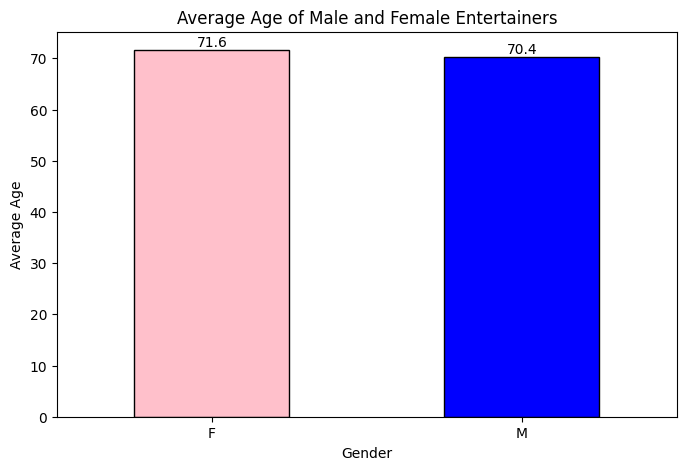

In [62]:
# Group by 'Gender (traditional)' and calculate the average age
average_age_by_gender = ent_final.groupby('Gender (traditional)')['Entertainer Age'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = average_age_by_gender.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age of Male and Female Entertainers')
plt.xticks(rotation=0)
plt.show()

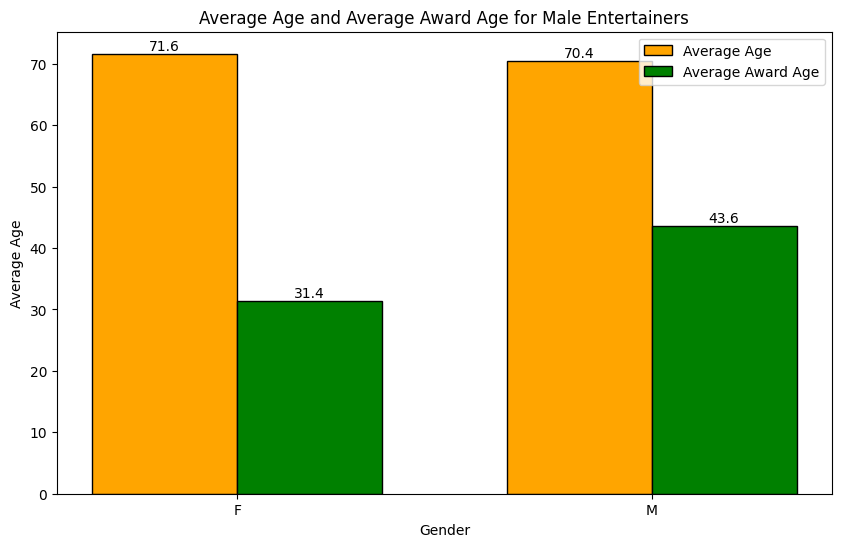

In [68]:

# Group by 'Gender (traditional)' and calculate the average age and average award age
average_age_and_award_by_gender = ent_final.groupby('Gender (traditional)')[['Entertainer Age', 'Award Age']].mean()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(average_age_and_award_by_gender.index))

# Plotting the bars for average age
bars1 = plt.bar(index, average_age_and_award_by_gender['Entertainer Age'], bar_width, label='Average Age', edgecolor='black', color='orange')

# Plotting the bars for average award age
bars2 = plt.bar([i + bar_width for i in index], average_age_and_award_by_gender['Award Age'], bar_width, label='Average Award Age', edgecolor='black', color='green')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age and Average Award Age for Male Entertainers')
plt.xticks([i + bar_width / 2 for i in index], average_age_and_award_by_gender.index)
plt.legend()

# Adding values on top of the bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 0.1, round(bar1.get_height(), 1), ha='center', va='bottom', color='black', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 0.1, round(bar2.get_height(), 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

In [73]:
#Export the final dataframe
ent_final.to_csv('Entertainer_Final.csv', index=False)